# Hex Softwares Project 3


  ## Loan Eligibility Prediction

## Task:

Load the dataset and explore it to understand the structure, features, and target variable (Loan
Status: Approved/Not Approved).


Loan Eligibility Prediction will provide you with comprehensive and detailed knowledge of Data
Science concepts with a hands-on project where you will learn to develop a Loan Eligibility
Prediction model using Python.

In the process you will learn popular Machine Learning Algorithms
and explore numerous Python Libraries.

## Data Source :

The data set used on this notebook was taken from Kaggle , it belong to Devzohaib · Updated 2 years ago. The link below directs you straight to the source 😉
https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan 

## Download and Load Data from Kaggle 

In [17]:
import pandas as pd

# Load the dataset from my local machine since I have downloaded it 
file_path = "C:\\Users\\princ\\Downloads\\loan eligibility data\\loan_data.csv"
loan_data = pd.read_csv(file_path)

# Now I am displaying the first few rows to ensure it's loaded correctly
print(loan_data.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [18]:
# Get a summary of the dataset
print(loan_data.info())

# Get a statistical summary of the numerical features
print(loan_data.describe())

# Check for missing values
print(loan_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

## Data Cleaning 

In [24]:
import pandas as pd

# Load the dataset from your local machine
file_path = "C:\\Users\\princ\\Downloads\\loan eligibility data\\loan_data.csv"
loan_data = pd.read_csv(file_path)

# Drop irrelevant columns
loan_data.drop(columns=['Loan_ID'], inplace=True)

# Handle missing values
loan_data = loan_data.fillna(loan_data.mean(numeric_only=True))  # Fill numeric missing values with mean

# Display the first few rows to ensure it's loaded correctly
print(loan_data.head())


  Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3 

In [25]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in categorical_columns:
    loan_data[col] = le.fit_transform(loan_data[col])

# Define features and target variable
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']


## Data Processing

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in categorical_columns:
    loan_data[col] = le.fit_transform(loan_data[col])

# Define features and target variable
X = loan_data.drop('Loan_Status', axis=1)
y = loan_data['Loan_Status']


## Splitting the Data

In [27]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Visualize the Distribution of Loan Status
This helps us understand the balance between approved and not approved loans.

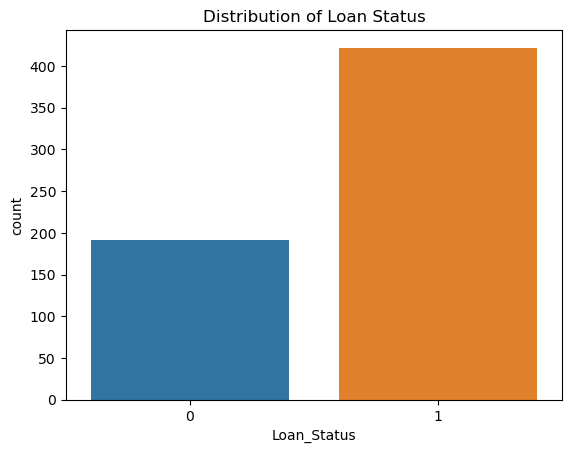

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
sns.countplot(x='Loan_Status', data=loan_data)
plt.title('Distribution of Loan Status')
plt.show()


## Model Building

In [29]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


C:\Users\princ\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Predictions

In [30]:
# Make predictions
y_pred = model.predict(X_test)


## Visualize Actual vs. Predicted Loan Status
This helps us compare the actual and predicted values from the test set.

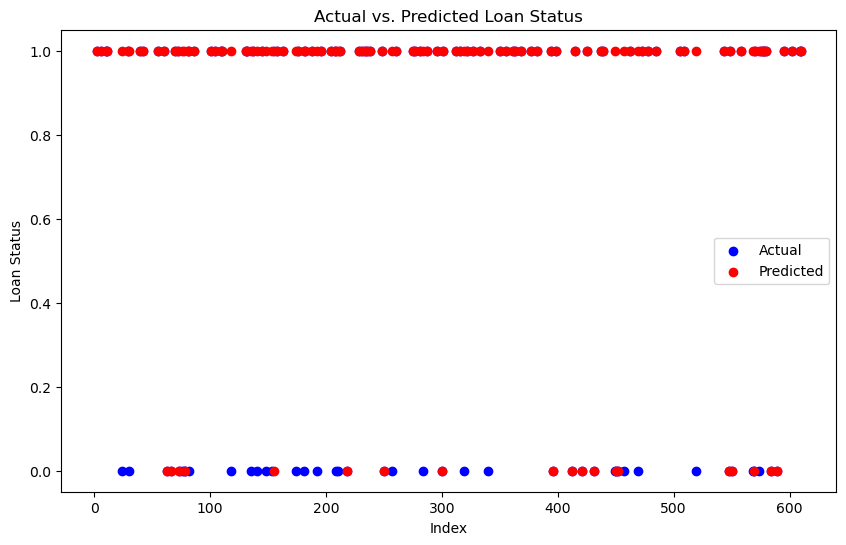

In [34]:
# DataFrame with Actual and Predicted Loan Status
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Plot the graph
plt.figure(figsize=(10, 6))
plt.scatter(predictions.index, predictions['Actual'], color='blue', label='Actual')
plt.scatter(predictions.index, predictions['Predicted'], color='red', label='Predicted')
plt.title('Actual vs. Predicted Loan Status')
plt.xlabel('Index')
plt.ylabel('Loan Status')
plt.legend()
plt.show()


## Confusion Matrix

A confusion matrix provides a more detailed breakdown of our model's performance by showing true positives, true negatives, false positives, and false negatives.

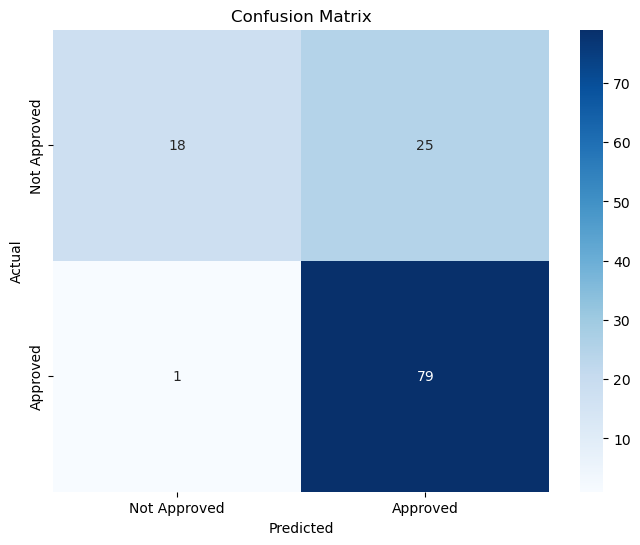

In [35]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Feature Importance
So , if  you're curious about which features are most influential in predicting loan eligibility, we can visualize the feature coefficients.

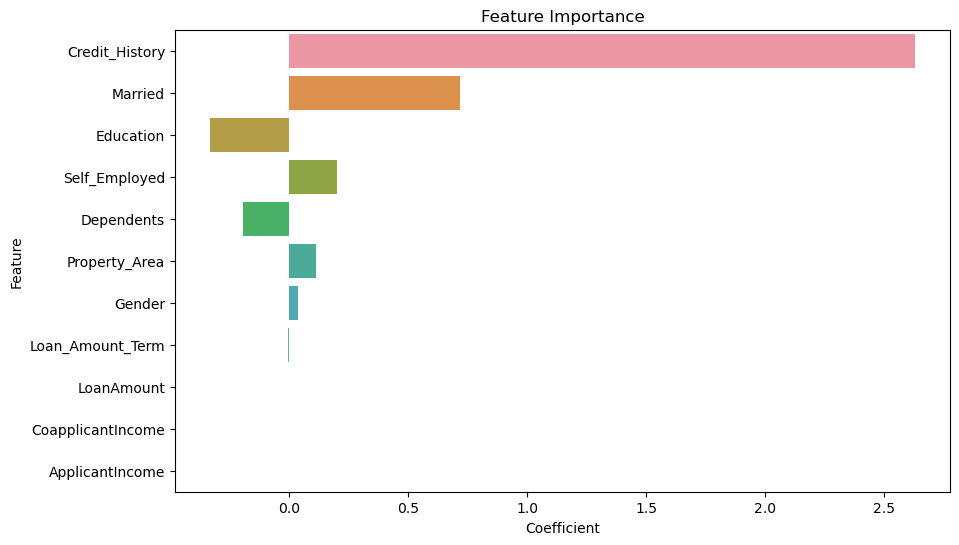

In [36]:
# Get feature importance
coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})

# Sort by absolute value of coefficients
coefficients["AbsoluteCoefficient"] = coefficients["Coefficient"].abs()
coefficients = coefficients.sort_values(by="AbsoluteCoefficient", ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x="Coefficient", y="Feature", data=coefficients)
plt.title('Feature Importance')
plt.show()


## Model Evaluation

In [31]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)


Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



## Conclusion Based on Model Evaluation

## Results Overview

## Accuracy:

The model achieved an accuracy of approximately 0.79

## Classification Report:

The classification report provides detailed metrics including Precision, Recall, F1-Score for each class (Loan Approved and Not Approved).

These metrics help evaluate the balance between precision (accuracy of positive predictions) and recall (coverage of actual positive instances).

## Significance of the Results

## Accuracy:

Interpretation: Accuracy measures the proportion of correct predictions over the total predictions. While a good accuracy indicates the model's overall effectiveness, it should be complemented by other metrics to ensure balanced performance across different classes.

Precision, Recall, F1-Score:

Precision: Reflects the accuracy of positive predictions. High precision means fewer false positives.

Recall: Indicates the model's ability to correctly identify all relevant instances. High recall means fewer false negatives.

F1-Score: Harmonic mean of precision and recall. A balanced measure that considers both false positives and false negatives.

## Imbalance Handling:

Class Distribution: If the classes (Loan Approved vs. Not Approved) are imbalanced, the model might favor the majority class. Evaluating F1-Scores helps assess the model's performance on the minority class.

## Model Insights:

Strengths: The logistic regression model is straightforward and interpretable. It provides insights into which features are most influential in predicting loan eligibility.

Weaknesses: If the dataset is complex or nonlinear, logistic regression might not capture all patterns effectively. Advanced models like Random Forests or Gradient Boosting could be explored.

## Next Steps:
Feature Engineering:

Explore additional features that could improve model performance. For example, interaction terms or derived features based on existing columns.

## Hyperparameter Tuning:

Optimize the logistic regression model by tuning its hyperparameters to improve performance.

## Model Comparison:

Compare logistic regression with other models like Decision Trees, Random Forests, and Gradient Boosting to identify the best-performing model.

## Cross-Validation:

Implement cross-validation to ensure the model generalizes well to unseen data and isn't overfitted to the training set.

## Address Class Imbalance:

If the classes are imbalanced, consider techniques like oversampling the minority class or using specialized algorithms that handle imbalance effectively.

## Conclusion:
The initial results indicate that the logistic regression model provides a solid starting point for predicting loan eligibility. However, there is room for improvement through feature engineering, hyperparameter tuning, and model comparison. By addressing these areas, we can develop a more robust and accurate predictive model for loan eligibility.